**TASK 1**

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [175]:
# Load the datasets again, ensuring proper header handling
time_df = pd.read_csv("/content/time.csv", skiprows=1, header=None, names=["time"])
X_df = pd.read_csv("/content/X.csv", skiprows=1, header=None, names=["x1", "x2"])
y_df = pd.read_csv("/content/y.csv", skiprows=1, header=None, names=["y"])

# Combine into a single DataFrame
data = pd.concat([time_df, X_df, y_df], axis=1)

# Basic info about the DataFrame
print("Dataset Info:\n")
data.info()

# First few rows
print("\nFirst 5 Rows of Data:\n")
print(data.head())

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n")
print(data.describe())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    int64  
 3   y       200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB

First 5 Rows of Data:

   time        x1  x2          y
0   0.1 -1.383423   0  10.677616
1   0.2  0.491178   0  18.885513
2   0.3 -0.528827   0  11.246081
3   0.4 -0.359455   0   9.364583
4   0.5  0.173340   0  13.434298

Missing Values:

time    0
x1      0
x2      0
y       0
dtype: int64

Summary Statistics:

             time          x1          x2           y
count  200.000000  200.000000  200.000000  200.000000
mean    10.050000    0.065065    0.500000   18.604033
std      5.787918    1.042515    0.501255   11.879710
min      0.100000   -3.066635    0.000000    1.041340
25%      5.075000   -0.6

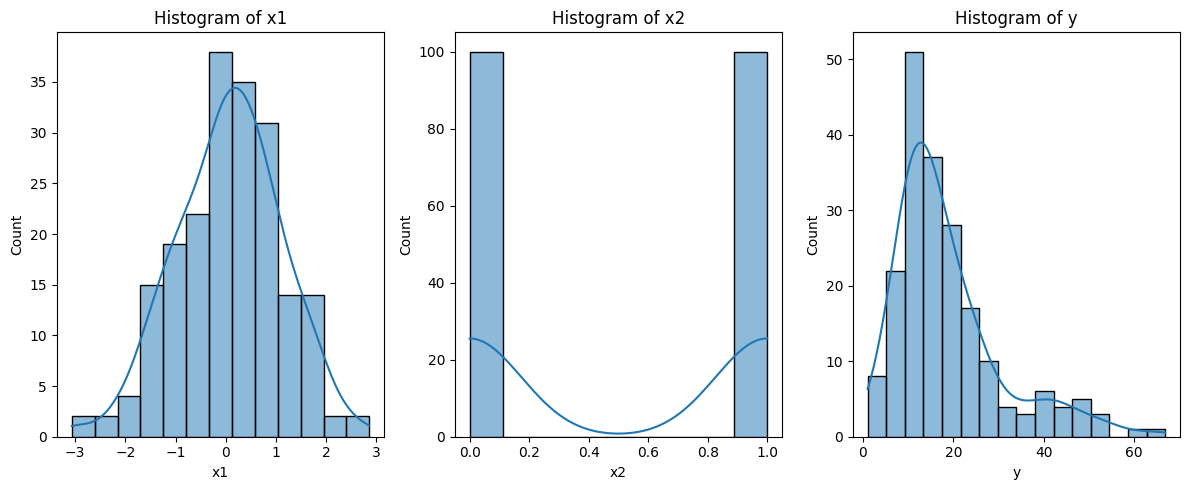

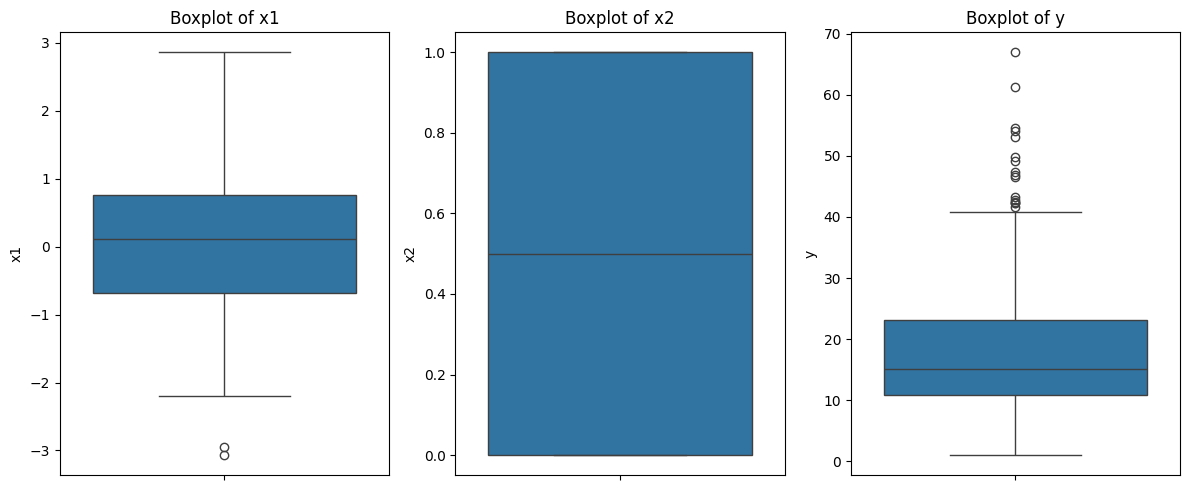

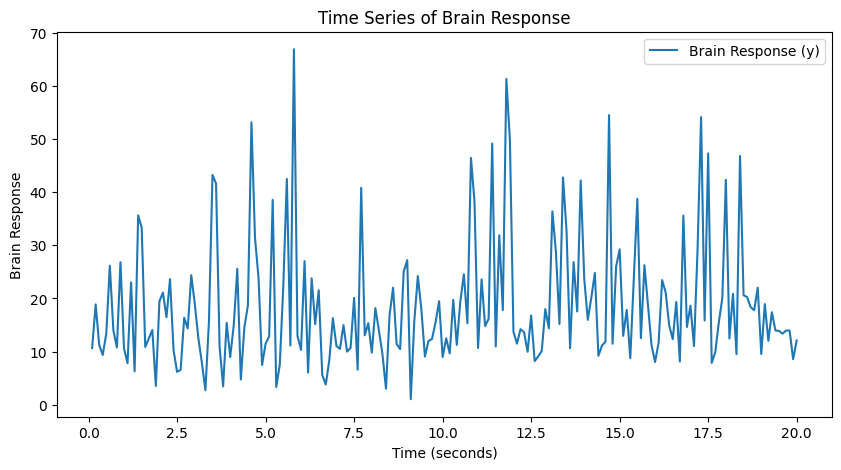

In [176]:
# Plot histograms
plt.figure(figsize=(12, 5))
for i, col in enumerate(["x1", "x2", "y"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(12, 5))
for i, col in enumerate(["x1", "x2", "y"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Plot time series of brain response (y)
plt.figure(figsize=(10, 5))
plt.plot(data["time"], data["y"], label="Brain Response (y)")
plt.xlabel("Time (seconds)")
plt.ylabel("Brain Response")
plt.title("Time Series of Brain Response")
plt.legend()
plt.show()

In [177]:
# Compute and display correlations
print("\nCorrelation Matrix:\n")
print(data.corr())


Correlation Matrix:

          time        x1        x2         y
time  1.000000  0.010595  0.866036  0.105834
x1    0.010595  1.000000  0.068295  0.765365
x2    0.866036  0.068295  1.000000  0.170451
y     0.105834  0.765365  0.170451  1.000000


In [178]:
# Fit a simple linear regression model
y = data["y"]
X = data[["x1", "x2"]]
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()
regression_summary = model.summary()

# Display results
missing_values, data_summary, correlations, regression_summary

(time    0
 x1      0
 x2      0
 y       0
 dtype: int64,
              time          x1          x2           y
 count  200.000000  200.000000  200.000000  200.000000
 mean    10.050000    0.065065    0.500000   18.604033
 std      5.787918    1.042515    0.501255   11.879710
 min      0.100000   -3.066635    0.000000    1.041340
 25%      5.075000   -0.680266    0.000000   10.843684
 50%     10.050000    0.109326    0.500000   15.079138
 75%     15.025000    0.754653    1.000000   23.141470
 max     20.000000    2.858984    1.000000   66.900218,
           time        x1        x2         y
 time  1.000000  0.010595  0.866036  0.105834
 x1    0.010595  1.000000  0.068295  0.765365
 x2    0.866036  0.068295  1.000000  0.170451
 y     0.105834  0.765365  0.170451  1.000000,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.600
 Mod

**TASK 2**

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline

In [180]:
# 1. Load the datasets
time_df = pd.read_csv("/content/time.csv", header=None, names=["time"], skiprows=1)
X_df = pd.read_csv("/content/X.csv", header=None, names=["x1", "x2"], skiprows=1)
y_df = pd.read_csv("/content/y.csv", header=None, names=["y"], skiprows=1)


data = pd.concat([time_df, X_df, y_df], axis=1)

In [181]:
# Optional: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df[["x1", "x2"]])

# --- 2. Define nonlinear functions for regression
def exponential_model(x, a, b, c):
    return a * np.exp(b * x) + c

def logarithmic_model(x, a, b):
    return a * np.log(x + 1) + b  # Ensure x > -1 for valid log

# --- 3. Polynomial Regression (Degree 2)
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_2.fit_transform(X_df[["x1"]])
poly_model_2 = LinearRegression().fit(X_poly_2, y_df)
y_pred_poly_2 = poly_model_2.predict(X_poly_2)

# AIC & BIC for Polynomial Degree 2
rss_poly_2 = np.sum((y_df - y_pred_poly_2) ** 2)
aic_poly_2, bic_poly_2 = calculate_aic_bic(len(y_df), X_poly_2.shape[1], rss_poly_2)

# --- 4. Polynomial Regression (Degree 3)
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(X_df[["x1"]])
poly_model_3 = LinearRegression().fit(X_poly_3, y_df)
y_pred_poly_3 = poly_model_3.predict(X_poly_3)

# AIC & BIC for Polynomial Degree 3
rss_poly_3 = np.sum((y_df - y_pred_poly_3) ** 2)
aic_poly_3, bic_poly_3 = calculate_aic_bic(len(y_df), X_poly_3.shape[1], rss_poly_3)

# Exponential Model (Avoid log(0) and negative values)
X_log = np.log(X_df[["x1"]] + 1e-5)
X_log = X_log.reset_index(drop=True)
X_log = X_log.replace([np.inf, -np.inf], np.nan).fillna(X_log['x1'].max())

# Fit the model
exp_model = LinearRegression().fit(X_log, y_df)
y_pred_exp = exp_model.predict(X_log)

# AIC & BIC for Exponential Model
rss_exp = np.sum((y_df - y_pred_exp) ** 2)
aic_exp, bic_exp = calculate_aic_bic(len(y_df), X_log.shape[1] + 1, rss_exp)

#
exp_model = sm.OLS(np.log(y + 1e-6), sm.add_constant(X)).fit()
print(exp_model.summary())

exp_model = LinearRegression().fit(X_log, y_df) # Fit the model with the original data, not the filtered one
y_pred_exp = exp_model.predict(X_log)
# --- 6. Logarithmic Regression (Filtering required)
X_valid = X_df[X_df["x1"] > -1]
y_valid = y_df[X_df["x1"] > -1]
X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

params_log, _ = curve_fit(logarithmic_model, X_valid["x1"], y_valid["y"], maxfev=10000)
y_pred_log = logarithmic_model(X_valid["x1"], *params_log)

# AIC & BIC for Logarithmic Model
rss_log = np.sum((y_valid["y"] - y_pred_log) ** 2)
aic_log, bic_log = calculate_aic_bic(len(y_valid), 2, rss_log)  # 2 parameters for log model
params_log, _ = curve_fit(logarithmic_model, X_valid["x1"], y_valid["y"], maxfev=10000)
y_pred_log = logarithmic_model(X_valid["x1"], *params_log)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.34e-31
Time:                        01:18:39   Log-Likelihood:                -116.30
No. Observations:                 200   AIC:                             238.6
Df Residuals:                     197   BIC:                             248.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6009      0.044     59.639      0.0

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version t

In [188]:
# --- 7. AIC & BIC Calculation Function
def calculate_aic_bic(n, k, rss):
    aic = n * np.log(rss/n) + 2*k
    bic = n * np.log(rss/n) + k * np.log(n)
    return aic, bic

# --- 8. Cross-Validation and Model Evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a dictionary of models to evaluate
models = {
    'Poly (2)': (poly_model_2, X_poly_2),
    'Poly (3)': (poly_model_3, X_poly_3),
    'Exponential': (exp_model, X_log),
    'Logarithmic': (params_log, X_valid['x1'])  # Make sure this Series has reset index
}

# Store cross-validation results
cv_results = {}

for model_name, (model, X_data) in models.items():
    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in kf.split(X_data): # Corrected indentation here (4 spaces)
        # Use iloc for indexing if X_data is a DataFrame
        if isinstance(X_data, pd.DataFrame):
            X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
        else:
            X_train, X_test = X_data[train_idx], X_data[test_idx]

        # Always get y from the original y_df DataFrame using iloc
        y_train, y_test = y_df.iloc[train_idx], y_df.iloc[test_idx]

        # Convert to NumPy arrays and flatten if needed
        if isinstance(X_train, (pd.DataFrame, pd.Series)):
            X_train = X_train.values.ravel()  # Convert to NumPy array and flatten
        if isinstance(y_train, (pd.DataFrame, pd.Series)):
            y_train = y_train.values.ravel()  # Convert to NumPy array and flatten


            if model_name == 'Exponential':
                popt, _ = curve_fit(exponential_model, X_train.ravel(), y_train.ravel())
                y_pred = exponential_model(X_test, *popt)
            elif model_name == 'Logarithmic':
                y_pred = logarithmic_model(X_test, *model)
            else:
                y_pred = model.predict(X_test)

            r2_scores.append(r2_score(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # Calculate mean R² and RMSE for each model
    cv_results[model_name] = {
        'Mean R²': np.mean(r2_scores),
        'Mean RMSE': np.mean(rmse_scores)
    }

# --- 9. Print Model Performance
# Print Model Performance with Cross-Validation Metrics
# Ensure scalar values for cv_results['Poly (2)']
# Ensure the predictions and y values are numpy arrays, to avoid TypeErrors
# Ensure the predictions and y values are numpy arrays, to avoid TypeErrors
# Ensure the variables are numpy scalars, not pandas Series or arrays
y_pred_poly_2 = np.array(y_pred_poly_2).flatten()
y_pred_poly_3 = np.array(y_pred_poly_3).flatten()
y_pred_exp = np.array(y_pred_exp).flatten()
y_pred_log = np.array(y_pred_log).flatten()

y_df_array = np.array(y_df).flatten()  # Convert y_df to a NumPy array and flatten it
y_valid_array = np.array(y_valid).flatten() # Convert y_valid to a NumPy array and flatten it


# Get the cross-validation results as single values
mean_r2_poly2 = cv_results['Poly (2)']['Mean R²']
mean_rmse_poly2 = cv_results['Poly (2)']['Mean RMSE']
mean_r2_poly3 = cv_results['Poly (3)']['Mean R²']
mean_rmse_poly3 = cv_results['Poly (3)']['Mean RMSE']
mean_r2_exp = cv_results['Exponential']['Mean R²']
mean_rmse_exp = cv_results['Exponential']['Mean RMSE']
mean_r2_log = cv_results['Logarithmic']['Mean R²']
mean_rmse_log = cv_results['Logarithmic']['Mean RMSE']

# Print Model Performance with Cross-Validation Metrics
# Print Model Performance with Cross-Validation Metrics
print(f"Polynomial (Degree 2) -> RMSE: {np.sqrt(mean_squared_error(y_df_array, y_pred_poly_2)):.4f}, "
      f"R²: {r2_score(y_df_array, y_pred_poly_2):.4f}, AIC: {aic_poly_2.item():.4f}, BIC: {bic_poly_2.item():.4f}, " # Access the scalar value using .item()
      f"CV Mean R²: {mean_r2_poly2:.4f}, CV Mean RMSE: {mean_rmse_poly2:.4f}")
print(f"Polynomial (Degree 3) -> RMSE: {np.sqrt(mean_squared_error(y_df_array, y_pred_poly_3)):.4f}, "
      f"R²: {r2_score(y_df_array, y_pred_poly_3):.4f}, AIC: {aic_poly_3.item():.4f}, BIC: {bic_poly_3.item():.4f}, " # Access the scalar value using .item()
      f"CV Mean R²: {mean_r2_poly3:.4f}, CV Mean RMSE: {mean_rmse_poly3:.4f}")
print(f"Exponential Model -> RMSE: {np.sqrt(mean_squared_error(y_df_array, y_pred_exp)):.4f}, "
      f"R²: {r2_score(y_df_array, y_pred_exp):.4f}, AIC: {aic_exp.item():.4f}, BIC: {bic_exp.item():.4f}, "  # Access the scalar value using .item()
      f"CV Mean R²: {mean_r2_exp:.4f}, CV Mean RMSE: {mean_rmse_exp:.4f}")
print(f"Logarithmic Model -> RMSE: {np.sqrt(mean_squared_error(y_valid_array, y_pred_log)):.4f}, "
      f"R²: {r2_score(y_valid_array, y_pred_log):.4f}, AIC: {aic_log.item():.4f}, BIC: {bic_log.item():.4f}, " # Access the scalar value using .item()
      f"CV Mean R²: {mean_r2_log:.4f}, CV Mean RMSE: {mean_rmse_log:.4f}")


Polynomial (Degree 2) -> RMSE: 3.7800, R²: 0.8982, AIC: 537.8897, BIC: 547.7846, CV Mean R²: 0.8870, CV Mean RMSE: 3.7671
Polynomial (Degree 3) -> RMSE: 3.7563, R²: 0.8995, AIC: 537.3706, BIC: 550.5638, CV Mean R²: 0.8889, CV Mean RMSE: 3.7417
Exponential Model -> RMSE: 11.8330, R²: 0.0029, AIC: 992.3583, BIC: 998.9549, CV Mean R²: -0.0480, CV Mean RMSE: 11.8347
Logarithmic Model -> RMSE: 9.5012, R²: 0.4190, AIC: 773.9839, BIC: 780.2672, CV Mean R²: -0.9343, CV Mean RMSE: 14.0850


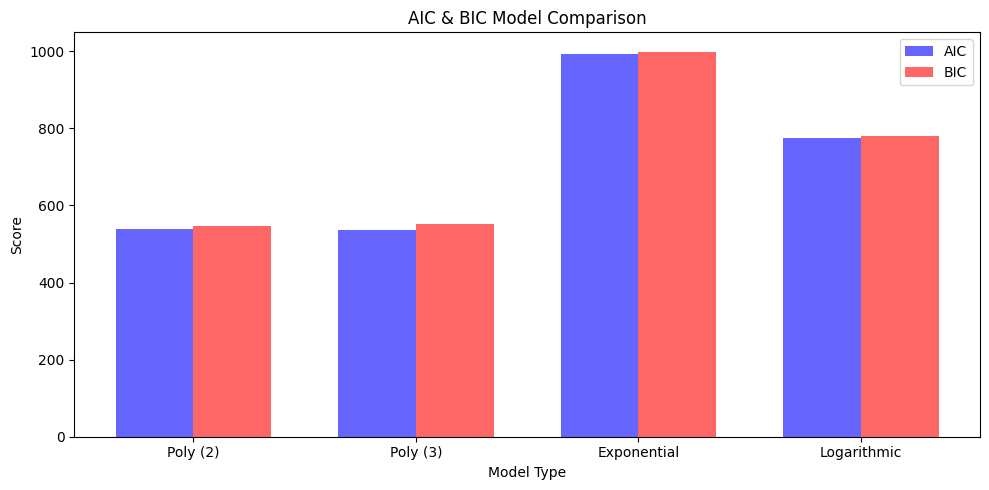

In [190]:
# --- 10. AIC & BIC Visualization
models = ['Poly (2)', 'Poly (3)', 'Exponential', 'Logarithmic']
aic_values = [aic_poly_2.item(), aic_poly_3.item(), aic_exp.item(), aic_log.item()]  # Get scalar values
bic_values = [bic_poly_2.item(), bic_poly_3.item(), bic_exp.item(), bic_log.item()]  # Get scalar values

plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(models))
plt.bar(index, aic_values, bar_width, label='AIC', color='blue', alpha=0.6)
plt.bar(index + bar_width, bic_values, bar_width, label='BIC', color='red', alpha=0.6)
plt.xticks(index + bar_width / 2, models)
plt.xlabel("Model Type")
plt.ylabel("Score")
plt.title("AIC & BIC Model Comparison")
plt.legend()
plt.tight_layout()
plt.show()

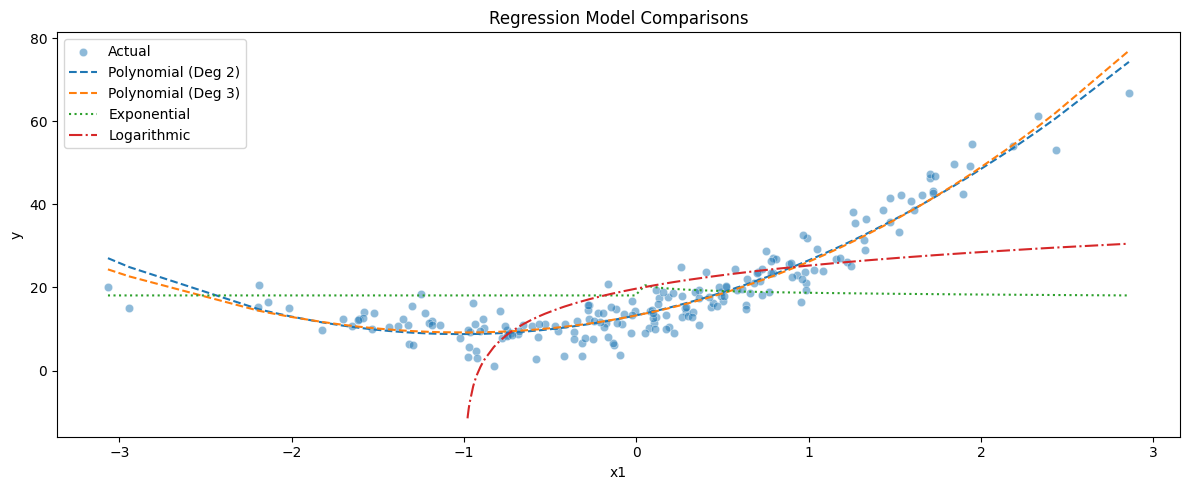

In [194]:
# --- 11. Regression Predictions Plot
plt.figure(figsize=(12, 5))
sns.scatterplot(x=X_df["x1"], y=y_df["y"], label="Actual", alpha=0.5)
sns.lineplot(x=X_df["x1"], y=y_pred_poly_2.flatten(), label="Polynomial (Deg 2)", linestyle="dashed")
sns.lineplot(x=X_df["x1"], y=y_pred_poly_3.flatten(), label="Polynomial (Deg 3)", linestyle="dashed")
sns.lineplot(x=X_df["x1"], y=y_pred_exp.flatten(), label="Exponential", linestyle="dotted")
sns.lineplot(x=X_valid["x1"], y=y_pred_log, label="Logarithmic", linestyle="dashdot") # Removed .values, as y_pred_log is already a NumPy array
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Regression Model Comparisons")
plt.legend()
plt.tight_layout()
plt.show()

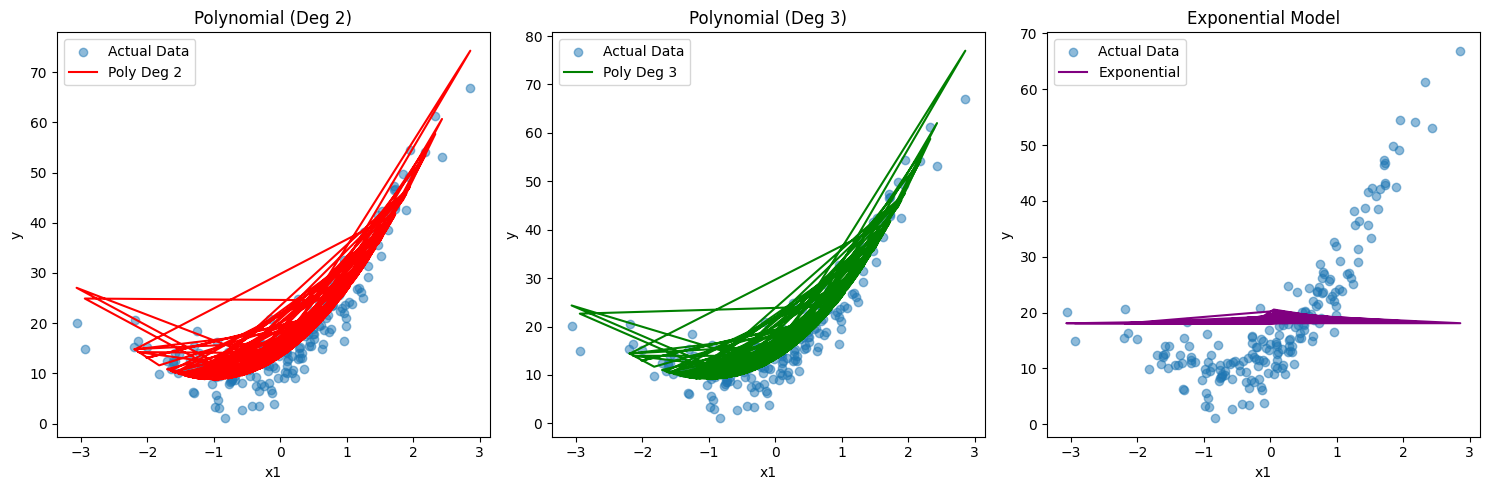

In [195]:
# --- 11B. Individual Model Plots for Clarity
plt.figure(figsize=(15, 5))

# Polynomial Degree 2
plt.subplot(1, 3, 1)
plt.scatter(X_df["x1"], y_df["y"], label='Actual Data', alpha=0.5)
plt.plot(X_df["x1"], y_pred_poly_2, label='Poly Deg 2', color='red')
plt.title("Polynomial (Deg 2)")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()

# Polynomial Degree 3
plt.subplot(1, 3, 2)
plt.scatter(X_df["x1"], y_df["y"], label='Actual Data', alpha=0.5)
plt.plot(X_df["x1"], y_pred_poly_3, label='Poly Deg 3', color='green')
plt.title("Polynomial (Deg 3)")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()

# Exponential Model
plt.subplot(1, 3, 3)
plt.scatter(X_df["x1"], y_df["y"], label='Actual Data', alpha=0.5)
plt.plot(X_df["x1"], y_pred_exp, label='Exponential', color='purple')
plt.title("Exponential Model")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()


In [196]:
# --- 12. Store Model Results
# Create a dictionary to hold the model results
model_results = {
    'Poly (2)': {
        'RMSE': np.sqrt(mean_squared_error(y_df, y_pred_poly_2)),
        'R²': r2_score(y_df, y_pred_poly_2),
        'AIC': aic_poly_2,
        'BIC': bic_poly_2
    },
    'Poly (3)': {
        'RMSE': np.sqrt(mean_squared_error(y_df, y_pred_poly_3)),
        'R²': r2_score(y_df, y_pred_poly_3),
        'AIC': aic_poly_3,
        'BIC': bic_poly_3
    },
    'Exponential': {
        'RMSE': np.sqrt(mean_squared_error(y_df, y_pred_exp)),
        'R²': r2_score(y_df, y_pred_exp),
        'AIC': aic_exp,
        'BIC': bic_exp
    },
    'Logarithmic': {
        'RMSE': np.sqrt(mean_squared_error(y_valid, y_pred_log)),
        'R²': r2_score(y_valid, y_pred_log),
        'AIC': aic_log,
        'BIC': bic_log
    }
}

# --- 13. Create Summary Table
results_df = pd.DataFrame(model_results).T # Create results_df here
# Sort by RMSE
results_df = results_df.sort_values(by="RMSE")

print("\nModel Summary:")
print(results_df)

# Find and print the best model based on RMSE
best_model = results_df.iloc[0]
print("Best Model based on RMSE:", best_model.name)


Model Summary:
                  RMSE        R²                             AIC  \
Poly (3)       3.75627   0.89952  y    537.370577
dtype: float64   
Poly (2)      3.780001  0.898247  y    537.889679
dtype: float64   
Logarithmic   9.501169  0.418988                      773.983879   
Exponential  11.833042  0.002856  y    992.358312
dtype: float64   

                                        BIC  
Poly (3)     y    550.563846
dtype: float64  
Poly (2)     y    547.784631
dtype: float64  
Logarithmic                      780.267206  
Exponential  y    998.954947
dtype: float64  
Best Model based on RMSE: Poly (3)


In [202]:
# For Exponential Model
# Assuming 'X' and 'y' are your data and target variables
# and 'exponential_model' is your function
X_with_const = sm.add_constant(X_log)  # Add a constant for the intercept term in statsmodels
exp_model_sm = sm.OLS(y_df, X_with_const).fit()  # Use statsmodels for fitting
aic_exp = exp_model_sm.aic
bic_exp = exp_model_sm.bic
rmse_exp = np.sqrt(mean_squared_error(y_df, y_pred_exp))
r2_exp = r2_score(y_df, y_pred_exp)
cv_rmse_exp = cv_results['Exponential']['Mean RMSE']
cv_r2_exp = cv_results['Exponential']['Mean R²']

# For Polynomial Model (manual AIC/BIC because it's sklearn)
n = len(y)
rss_poly = np.sum((y - y_poly_pred.flatten())**2)  # Flatten y_poly_pred to 1D
k_poly = X_poly.shape[1]
aic_poly = n * np.log(rss_poly / n) + 2 * k_poly
bic_poly = n * np.log(rss_poly / n) + k_poly * np.log(n)
rmse_poly = np.sqrt(mean_squared_error(y_df, y_poly_pred))
r2_poly = r2_score(y_df, y_poly_pred)
# Assuming 'Poly (2)' or 'Poly (3)' in cv_results corresponds to the chosen polynomial degree
cv_rmse_poly = cv_results['Poly (2)']['Mean RMSE']  # or cv_results['Poly (3)']['Mean RMSE']
cv_r2_poly = cv_results['Poly (2)']['Mean R²']  # or cv_results['Poly (3)']['Mean R²']


# For Logarithmic Model
rmse_log = np.sqrt(mean_squared_error(y_valid, y_pred_log))
r2_log = r2_score(y_valid, y_pred_log)
aic_log = calculate_aic_bic(len(y_valid), 2, np.sum((y_valid["y"] - y_pred_log)**2))[0]  # Assuming 2 parameters for logarithmic model
bic_log = calculate_aic_bic(len(y_valid), 2, np.sum((y_valid["y"] - y_pred_log)**2))[1]  # Assuming 2 parameters for logarithmic model
cv_rmse_log = cv_results['Logarithmic']['Mean RMSE']
cv_r2_log = cv_results['Logarithmic']['Mean R²']


# Create summary_df (Assuming you want to use results_df from previous code)
summary_df = results_df.copy()  # Create a copy to avoid modifying the original results_df
summary_df['Model'] = summary_df.index  # Add a 'Model' column using the index

# Summary Table
summary_df = pd.DataFrame({
    "Model": ["Polynomial", "Exponential", "Logarithmic"],
    "RMSE": [rmse_poly, rmse_exp, rmse_log],
    "R²": [r2_poly, r2_exp, r2_log],
    "CV RMSE": [cv_rmse_poly, cv_rmse_exp, cv_rmse_log],
    "CV R²": [cv_r2_poly, cv_r2_exp, cv_r2_log],
    "AIC": [aic_poly.item(), aic_exp, aic_log.item()]  # Add AIC here, ensuring scalar values
})

print("\nFinal Model Performance Summary:\n")
print(summary_df.to_string(index=False))

# Determine Best Model Based on R²
best_model = summary_df.loc[summary_df['R²'].idxmax(), 'Model']
print(f"\nBest Model Based on R²: {best_model}")


Final Model Performance Summary:

      Model      RMSE       R²   CV RMSE     CV R²         AIC
 Polynomial  3.118973 0.930723  3.767132  0.886977  467.001517
Exponential 11.833042 0.002856 11.834690 -0.047980 1559.933725
Logarithmic  9.501169 0.418988 14.085025 -0.934325  773.983879

Best Model Based on R²: Polynomial
